### Notebook for Race, Gender, Hispanic Origin, 10-yr Age Groups, Deaths / Population

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns   

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MaxAbsScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RandomizedSearchCV


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import joblib

from sklearn.tree import export_graphviz
import pydot

In [3]:
wonder = pd.read_csv('data/RGH_10yr_18-19.csv')

In [4]:
wonder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Notes                 43 non-null     object 
 1   Gender                72 non-null     object 
 2   Gender Code           72 non-null     object 
 3   Hispanic Origin       72 non-null     object 
 4   Hispanic Origin Code  72 non-null     object 
 5   Single Race 6         72 non-null     object 
 6   Single Race 6 Code    72 non-null     object 
 7   Year                  72 non-null     float64
 8   Year Code             72 non-null     float64
 9   Deaths                72 non-null     float64
 10  Population            72 non-null     object 
 11  Crude Rate            72 non-null     object 
 12  Age Adjusted Rate     72 non-null     object 
dtypes: float64(3), object(10)
memory usage: 11.8+ KB


In [5]:
cols = wonder.columns.to_list()

In [6]:
cols

['Notes',
 'Gender',
 'Gender Code',
 'Hispanic Origin',
 'Hispanic Origin Code',
 'Single Race 6',
 'Single Race 6 Code',
 'Year',
 'Year Code',
 'Deaths',
 'Population',
 'Crude Rate',
 'Age Adjusted Rate']

In [7]:
cols_renamed = {'Notes': 'notes', 
 'Gender': 'gender',
 'Gender Code': 'gender_code',
 'Hispanic Origin': 'hispanic_origin',
 'Hispanic Origin Code': 'hispanic_origin_code',
 'Single Race 6': 'race', 
 'Single Race 6 Code': 'race_code',
 'Year': 'year',
 'Year Code': 'year_code',
 'Deaths': 'deaths',
 'Population': 'population',
 'Crude Rate': 'crude_rate'}

In [8]:
wonder.rename(mapper=cols_renamed, axis=1, inplace=True)

In [9]:
# wonder.drop(columns='notes', inplace=True, axis=1)

In [10]:
ten_yr_code_dict = {'5-14': 5, '15-24': 15, '25-34': 25, 
                    '35-44': 35, '45-54': 45, '55-64': 55, 
                    '65-74': 65, '75-84': 75, '85': 85}

In [13]:
wonder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   notes                 43 non-null     object 
 1   gender                72 non-null     object 
 2   gender_code           72 non-null     object 
 3   hispanic_origin       72 non-null     object 
 4   hispanic_origin_code  72 non-null     object 
 5   race                  72 non-null     object 
 6   race_code             72 non-null     object 
 7   year                  72 non-null     float64
 8   year_code             72 non-null     float64
 9   deaths                72 non-null     float64
 10  population            72 non-null     object 
 11  crude_rate            72 non-null     object 
 12  Age Adjusted Rate     72 non-null     object 
dtypes: float64(3), object(10)
memory usage: 11.8+ KB


In [15]:
wonder.hispanic_origin.value_counts()

Not Hispanic or Latino    24
Not Stated                24
Hispanic or Latino        24
Name: hispanic_origin, dtype: int64

In [16]:
wonder.drop(columns='hispanic_origin_code', inplace=True, axis=1)

In [17]:
wonder.race.value_counts()

Native Hawaiian or Other Pacific Islander    12
American Indian or Alaska Native             12
More than one race                           12
Black or African American                    12
Asian                                        12
White                                        12
Name: race, dtype: int64

In [18]:
wonder.drop(columns='race_code', inplace=True, axis=1)

In [19]:
wonder.year.value_counts()

2019.0    36
2018.0    36
Name: year, dtype: int64

In [20]:
wonder.drop(columns='year_code', inplace=True, axis=1)

In [21]:
deaths_from_nans = wonder[wonder['population']== 'Not Applicable'].index.values

In [22]:
num_from_nans = wonder.loc[wonder['population'] == 'Not Applicable', 'deaths'].sum()

In [23]:
num_from_nans

14350.0

In [24]:
total_num = wonder.loc[wonder['population'] != 'Not Applicable', 'deaths'].sum()

In [25]:
total_num

5629508.0

In [26]:
acct = num_from_nans / total_num
acct

0.002549068231184679

In [27]:
print(f'The removal of nan values from unspecified ethnicity removes {nan_removes:.2%} percent of the overall deaths recorded.')


NameError: name 'nan_removes' is not defined

In [28]:
wonder_n = wonder[wonder['population'] != 'Not Applicable']


In [29]:
wonder_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 114
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   notes              43 non-null     object 
 1   gender             48 non-null     object 
 2   gender_code        48 non-null     object 
 3   hispanic_origin    48 non-null     object 
 4   race               48 non-null     object 
 5   year               48 non-null     float64
 6   deaths             48 non-null     float64
 7   population         48 non-null     object 
 8   crude_rate         48 non-null     object 
 9   Age Adjusted Rate  48 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.8+ KB


In [30]:
lens = wonder_n.apply(lambda x: len(x.unique()))
lens

notes                39
gender                3
gender_code           3
hispanic_origin       3
race                  7
year                  3
deaths               49
population           49
crude_rate           49
Age Adjusted Rate    49
dtype: int64

In [31]:
wonder_n = wonder_n[wonder_n['crude_rate'] != 'Unreliable']


In [32]:
wonder_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 114
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   notes              43 non-null     object 
 1   gender             48 non-null     object 
 2   gender_code        48 non-null     object 
 3   hispanic_origin    48 non-null     object 
 4   race               48 non-null     object 
 5   year               48 non-null     float64
 6   deaths             48 non-null     float64
 7   population         48 non-null     object 
 8   crude_rate         48 non-null     object 
 9   Age Adjusted Rate  48 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.8+ KB


In [33]:
wonder_n.population = wonder_n.population.astype(float)
wonder_n.crude_rate = wonder_n.crude_rate.astype(float)
wonder_n['Age Adjusted Rate'] = wonder_n['Age Adjusted Rate'].astype(float)

In [34]:
wonder_n['crude_rate'] = wonder_n['deaths'] / wonder_n['population'] * 100_000

In [35]:
wonder_n.isnull().sum()


notes                48
gender               43
gender_code          43
hispanic_origin      43
race                 43
year                 43
deaths               43
population           43
crude_rate           43
Age Adjusted Rate    43
dtype: int64

In [36]:
wonder_na = wonder_n.dropna()

In [37]:
nan_removes = (wonder.deaths.sum() - wonder_na.deaths.sum()) / wonder.deaths.sum()

In [38]:
wonder_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   notes              0 non-null      object 
 1   gender             0 non-null      object 
 2   gender_code        0 non-null      object 
 3   hispanic_origin    0 non-null      object 
 4   race               0 non-null      object 
 5   year               0 non-null      float64
 6   deaths             0 non-null      float64
 7   population         0 non-null      float64
 8   crude_rate         0 non-null      float64
 9   Age Adjusted Rate  0 non-null      float64
dtypes: float64(5), object(5)
memory usage: 0.0+ bytes


In [39]:
wonder_na.drop('gender_code', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
wonder_na

,notes,gender,hispanic_origin,race,year,deaths,population,crude_rate,Age Adjusted Rate


In [204]:
wonder_na.reset_index(drop=True, inplace=True)

In [293]:
wonder_na.to_csv('data/wonder_na.csv', index=False)

In [294]:
# Start over here: 
wonder_na = pd.read_csv('data/wonder_na.csv')

In [295]:
# Split before preprocessing
won_label = wonder_na.pop('Age Adjusted Rate')


In [296]:
won_label

0       89.71
1      103.92
2      205.17
3      199.52
4      181.33
5      183.13
6      194.56
7      202.66
8      484.14
9      482.31
10     192.43
11     218.58
12     710.96
13     709.51
14     342.04
15     335.07
16     770.81
17     760.44
18     627.41
19     620.21
20     676.36
21     667.02
22     298.45
23     295.03
24     127.94
25     132.11
26     230.39
27     226.89
28     279.13
29     295.46
30     255.78
31     305.33
32     712.76
33     712.43
34     308.89
35     308.04
36     972.26
37     954.28
38     480.62
39     468.41
40    1162.68
41    1152.52
42     795.27
43     807.59
44     934.12
45     924.72
46     425.32
47     400.50
Name: Age Adjusted Rate, dtype: float64

In [297]:
wonder_na.columns

Index(['gender', 'hispanic_origin', 'race', 'year', 'deaths', 'population',
       'crude_rate'],
      dtype='object')

In [298]:
wonder_na.drop(columns=['deaths', 'population', 'crude_rate'], inplace=True, axis=1)

In [214]:
wonder_na.drop(columns=['gender_code'], inplace=True, axis=1)

In [301]:
wonder_na.to_csv('data/wonder_na.csv', index=False)

In [302]:
won_label.to_csv('data/won_label.csv', index=False)

#### Pipeline for Processing

In [303]:
wonder_na = pd.read_csv('data/wonder_na.csv')

In [304]:
wonder_na

,gender,hispanic_origin,race,year
0,Female,Hispanic or Latino,American Indian or Alaska Native,2018.0
1,Female,Hispanic or Latino,American Indian or Alaska Native,2019.0
2,Female,Hispanic or Latino,Asian,2018.0
3,Female,Hispanic or Latino,Asian,2019.0
4,Female,Hispanic or Latino,Black or African American,2018.0
5,Female,Hispanic or Latino,Black or African American,2019.0
6,Female,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,2018.0
7,Female,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,2019.0
8,Female,Hispanic or Latino,White,2018.0
9,Female,Hispanic or Latino,White,2019.0


In [224]:
cat_cols = ['gender', 'hispanic_origin', 'race',
       'year']
# num_cols = ['ten_yr_codes']

In [228]:
num_df = wonder_na[num_cols]

In [229]:
num_df

,ten_yr_codes
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
368,85.0
369,85.0
370,85.0
371,85.0


### One-Hot Encoding for Categorical Variables

In [305]:
encoder=OneHotEncoder(sparse=False, drop='first')

train_X_encoded = pd.DataFrame(encoder.fit_transform(wonder_na[cat_cols]), 
                               index=wonder_na.index, columns=encoder.get_feature_names(input_features=cat_cols))

In [306]:
len(train_X_encoded.columns)

8

In [307]:
train_X_encoded

,gender_Male,hispanic_origin_Not Hispanic or Latino,race_Asian,race_Black or African American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_White,year_2019.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Merge Num & Cat Columns back to X_Train

In [230]:
df = num_df.merge(train_X_encoded, how='inner', left_index=True, right_index=True)


In [231]:
df

,ten_yr_codes,gender_Male,hispanic_origin_Not Hispanic or Latino,race_Asian,race_Black or African American,race_More than one race,race_Native Hawaiian or Other Pacific Islander,race_White,year_2019.0
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
368,85.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
369,85.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
370,85.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
371,85.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [308]:
X = train_X_encoded.copy()

In [309]:
X.to_csv('data/X_wonder.csv')

In [310]:
X.shape

(48, 8)

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, won_label, test_size=0.2, random_state=42)

In [312]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 8), (10, 8), (38,), (10,))

#### Linear Regression 

In [314]:
model_lr = LinearRegression()

In [315]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [316]:
predict_train = model_lr.predict(X_train)

In [317]:
predict_train - y_train

8     -30.850555
3    -140.811462
6      12.137658
39     85.775791
33   -105.679865
13   -112.505819
17    -97.368587
45     20.455555
15     62.063958
9     -32.611698
16   -104.147445
29    186.237826
32   -102.418722
46    130.119198
0     172.459903
31     54.828348
30    107.969491
5     141.515993
11   -162.209198
34    -91.876222
1     154.658761
44     14.646698
21    121.103722
2    -142.870320
36   -214.612844
35    -94.617365
23     99.766222
41   -332.396754
10   -132.468055
22     99.937365
18    -82.286922
47    151.348055
20    115.354865
7       0.446515
42    -93.095089
14     58.685100
28    206.158968
38     77.156933
Name: Age Adjusted Rate, dtype: float64

In [318]:
predict_test = model_lr.predict(X_test)

In [319]:
print('RMSE on train data with LR: ', mean_squared_error(y_train, predict_train))
print('RMSE on test data with LR: ', mean_squared_error(y_test, predict_test))

RMSE on train data with LR:  15916.08516902584
RMSE on test data with LR:  37229.66890141689


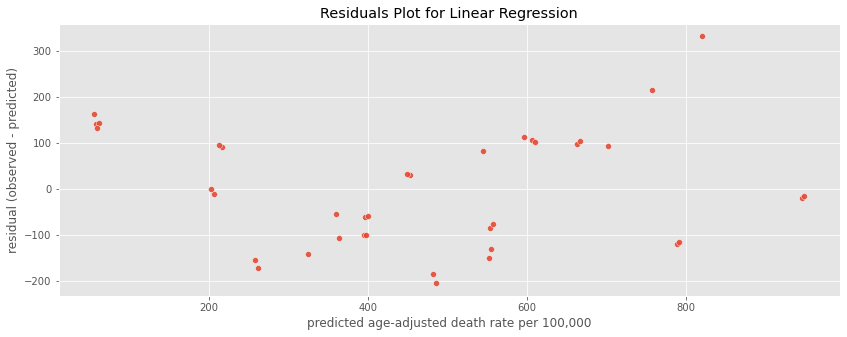

In [324]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(x=predict_train, y=y_train - predict_train, ax=ax, palette='Blues', alpha=0.9)
ax.set_xlabel('predicted age-adjusted death rate per 100,000')
ax.set_ylabel('residual (observed - predicted)')
ax.set_title('Residuals Plot for Linear Regression');

#### Lasso Regressor

In [325]:
model_lasso = Lasso(random_state=42)

In [326]:
model_lasso.fit(X_train, y_train)

Lasso(random_state=42)

In [327]:
predict_train_lasso = model_lasso.predict(X_train)

In [328]:
predict_test_lasso = model_lasso.predict(X_test)

In [329]:
print('RMSE on Train Data with Lasso: ', mean_squared_error(y_train, predict_train_lasso))
print('R_squared on Train Data with Lasso: ', r2_score(y_train, predict_train_lasso))

print('RMSE on Test Data with Lasso: ', mean_squared_error(y_test, predict_test_lasso))
print('R_squared on Train Data with Lasso: ', r2_score(y_test, predict_test_lasso))

RMSE on Train Data with Lasso:  15965.393484504684
R_squared on Train Data with Lasso:  0.782376982182167
RMSE on Test Data with Lasso:  37307.50601102768
R_squared on Train Data with Lasso:  0.7172171706694792


#### Ridge Regressor

In [330]:
model_ridge = Ridge(random_state=42)

In [331]:
model_ridge.fit(X_train, y_train)

Ridge(random_state=42)

In [332]:
predict_train_ridge = model_ridge.predict(X_train)

In [333]:
predict_test_ridge = model_ridge.predict(X_test)

In [334]:
print('RMSE on Train Data with ridge: ', mean_squared_error(y_train, predict_train_ridge))
print('R_squared on Train Data with ridge: ', r2_score(y_train, predict_train_ridge))

print('RMSE on Test Data with ridge: ', mean_squared_error(y_test, predict_test_ridge))
print('R_squared on Train Data with ridge: ', r2_score(y_test, predict_test_ridge))

RMSE on Train Data with ridge:  16623.677345560543
R_squared on Train Data with ridge:  0.7734039668560624
RMSE on Test Data with ridge:  42644.600856564575
R_squared on Train Data with ridge:  0.6767631456703238


#### Elastic Net Regressor

In [340]:
ratios = [0.1, 0.3, 0.5, 0.8, 1.0]

In [347]:
for i in ratios: 
    model_en = ElasticNetCV(l1_ratio = i, random_state=42)
    model_en.fit(X_train, y_train)
    predict_train_en = model_en.predict(X_train)
    predict_test_en = model_en.predict(X_test)
    mse_train = mean_squared_error(y_train, predict_train_en)
    r2_train = r2_score(y_train, predict_train_en)
    mse_test = mean_squared_error(y_test, predict_test_en)
    r2_test = r2_score(y_test, predict_test_en)
    print('MSE Train: ', mse_train, f'R2 Train: ', r2_train, f'MSE Test: ', mse_test, f'R2_test: ', r2_test)
    

MSE Train:  49463.4009179695 R2 Train:  0.32576828815717407 MSE Test:  104466.3570973392 R2_test:  0.20816759980937816
MSE Train:  28224.435851410955 R2 Train:  0.615274943761873 MSE Test:  71788.59073314627 R2_test:  0.45585800361007034
MSE Train:  20252.943934442195 R2 Train:  0.7239337205821816 MSE Test:  54742.863367407976 R2_test:  0.5850609315960726
MSE Train:  16614.23240313616 R2 Train:  0.7735327101203926 MSE Test:  42524.95955299015 R2_test:  0.6776700008838448
MSE Train:  16438.944488666664 R2 Train:  0.7759220458402336 MSE Test:  38245.05889579466 R2_test:  0.7101107225106817


#### Lasso Wins

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual v. Predicted Plot for Lasso Regressor Model, Training Set')

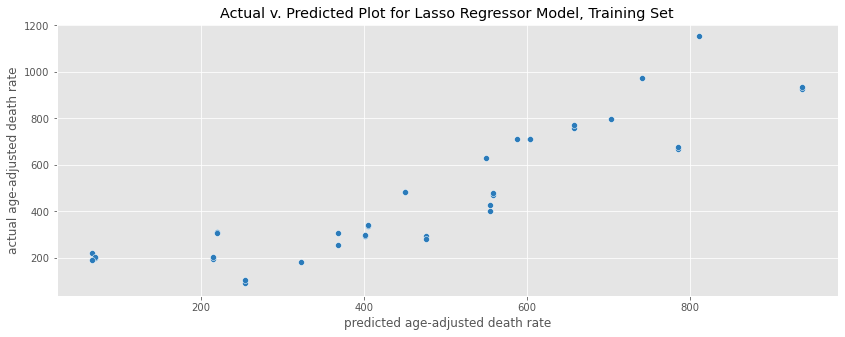

In [353]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_train_lasso, y_train, ax=ax, color='#2b7bba');
ax.set_xlabel('predicted age-adjusted death rate')
ax.set_ylabel('actual age-adjusted death rate')
ax.set_title('Actual v. Predicted Plot for Lasso Regressor Model, Training Set')

In [ ]:
print('MSE on Train Data with RF: ', mean_squared_error(y_train, predict_train))
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train))
print('\n')
print('MSE on Test Data with RF: ', mean_squared_error(y_test, predict_test))
print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test, squared=False))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test))

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actual v. Predicted Plot for Lasso Regressor Model, Test Set')

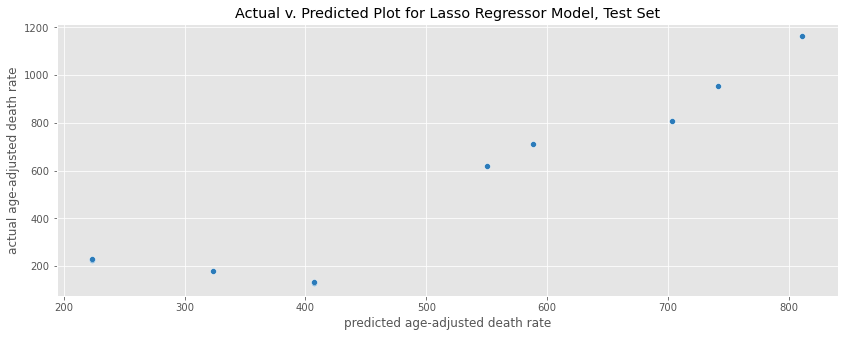

In [352]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_test_lasso, y_test, ax=ax, color='#2b7bba');
ax.set_xlabel('predicted age-adjusted death rate')
ax.set_ylabel('actual age-adjusted death rate')
ax.set_title('Actual v. Predicted Plot for Lasso Regressor Model, Test Set')

#### Random Forest Regressor

In [354]:
model_rf = RandomForestRegressor()

In [355]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [356]:
predict_train_rf = model_rf.predict(X_train)

In [357]:
predict_test_rf = model_rf.predict(X_test)

In [358]:
print('RMSE on Train Data with RF: ', mean_squared_error(y_train, predict_train_rf))
print('R_squared on Train Data with RF: ', r2_score(y_train, predict_train_rf))

print('RMSE on Test Data with RF: ', mean_squared_error(y_test, predict_test_rf))
print('R_squared on Train Data with RF: ', r2_score(y_test, predict_test_rf))

RMSE on Train Data with RF:  985.7972361807917
R_squared on Train Data with RF:  0.9865626757209361
RMSE on Test Data with RF:  9278.086923522013
R_squared on Train Data with RF:  0.9296741071292053


In [359]:
pal = sns.color_palette("Blues")
print(pal.as_hex())

['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Residuals Plot for Random Forest Regressor Model on Training Set')

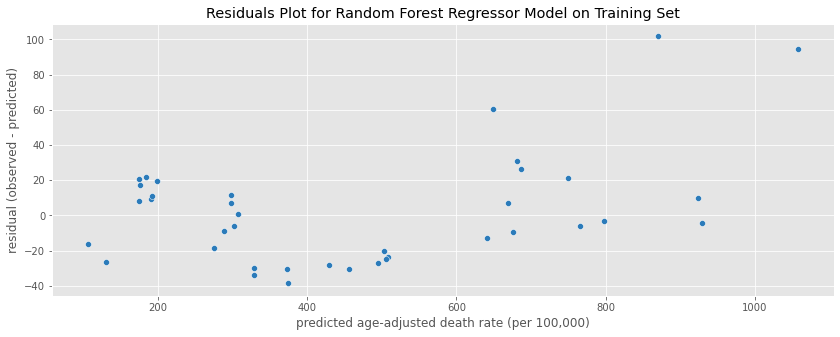

In [363]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_train_rf, y_train - predict_train_rf, ax=ax, color='#2b7bba');
ax.set_xlabel('predicted age-adjusted death rate (per 100,000)')
ax.set_ylabel('residual (observed - predicted)')
ax.set_title('Residuals Plot for Random Forest Regressor Model on Training Set')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted v. Actual Plot for Random Forest Regressor Model, Test Set')

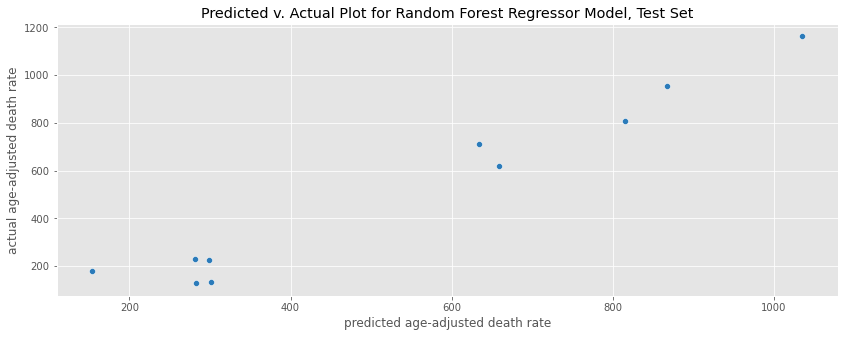

In [364]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.scatterplot(predict_test_rf, y_test, ax=ax, color='#2b7bba');
ax.set_xlabel('predicted age-adjusted death rate')
ax.set_ylabel('actual age-adjusted death rate')
ax.set_title('Predicted v. Actual Plot for Random Forest Regressor Model, Test Set')

In [365]:
mae_train = mean_absolute_error(y_train, predict_train_rf)
mae_test = mean_absolute_error(y_test, predict_test_rf)
print('MAE on Training Set: ', mae_train)
print('MAE on Test Set: ', mae_test)

MAE on Training Set:  23.141023684210577
MAE on Test Set:  81.3347200000001


In [366]:
from yellowbrick.regressor import ResidualsPlot

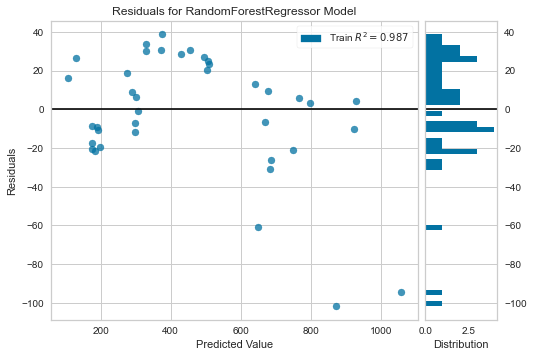

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [367]:
visualizer = ResidualsPlot(model_rf)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(alpha=0.1)  

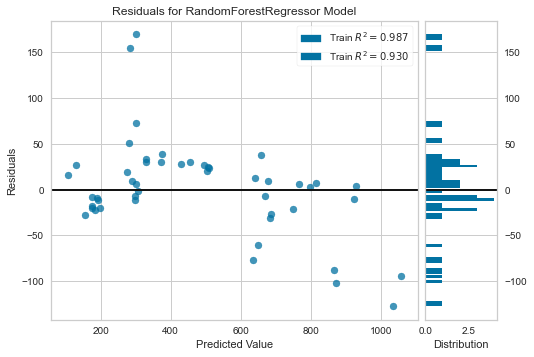

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [368]:
visualizer.fit(X_test, y_test)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(alpha=0.1) 

In [369]:
feature_importances = pd.DataFrame(model_rf.fit(X_train, y_train).feature_importances_,
                                   index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [370]:
feature_importances.head(20)

,importance
hispanic_origin_Not Hispanic or Latino,0.385263
race_White,0.179291
race_More than one race,0.139666
gender_Male,0.107539
race_Asian,0.107191
race_Black or African American,0.060120
race_Native Hawaiian or Other Pacific Islander,0.011441
year_2019.0,0.009487


In [372]:
filename = 'model_rf_age_adjusted_wonder.sav'
joblib.dump(model_rf, filename)

# some time later...

['model_rf_age_adjusted_wonder.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)